In [1]:
# https://www.kaggle.com/ericob/preprocessing-and-lung-segmentation


In [4]:
%matplotlib inline
import nibabel
import matplotlib.pyplot as plt
import numpy as np
import pathlib

In [16]:
ct_scan_folder = pathlib.Path(r"D:\Studia\sem7\inzynierka\data\ct_scan")
lung_mask_folder = pathlib.Path(r"D:\Studia\sem7\inzynierka\data\lung_mask")
image_file = "coronacases_org_001.nii"
mask_file = "coronacases_001.nii"

In [8]:
# Load image files with nibabel 
CT = nibabel.load(ct_scan_folder / image_file)

In [9]:
CT_array = CT.get_fdata()
CT_array.shape

(512, 512, 301)

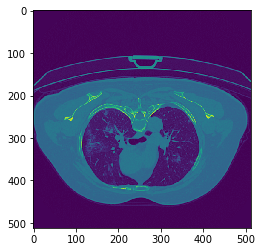

In [10]:
CT_array = CT_array.T
plt.imshow(CT_array[200])

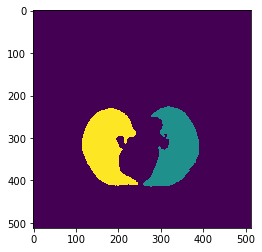

In [18]:
mask = nibabel.load(lung_mask_folder / mask_file)

left_mask_array = mask.get_fdata()
left_mask_array = left_mask_array.T
right_mask_array = left_mask_array.copy()

plt.imshow(left_mask_array[200])

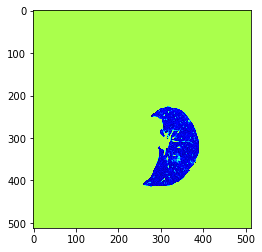

In [19]:
left_mask_array[left_mask_array == 2] = 0
right_mask_array[right_mask_array == 1] = 0
right_mask_array = right_mask_array / 2

left_lung_array = np.multiply(CT_array, left_mask_array)
right_lung_array = np.multiply(CT_array, right_mask_array)

left_lung_array = left_lung_array - np.amin(left_lung_array)
left_lung_array = left_lung_array / np.amax(left_lung_array)

right_lung_array = right_lung_array - np.amin(right_lung_array)
right_lung_array = right_lung_array / np.amax(right_lung_array)

plt.imshow(left_lung_array[200], cmap='jet')

216 437 255 414


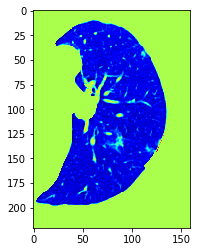

In [20]:
width = left_mask_array.shape[1]
height = left_mask_array.shape[2]

xmin = 0
xmax = width
ymin = 0
ymax = height

for i in range(round(width / 2)):
    if np.sum(left_mask_array[:,:i,:]) == 0: xmin = i
    if np.sum(left_mask_array[:,width - i:,:]) == 0: xmax = width - i
    if np.sum(left_mask_array[:,:,:i]) == 0: ymin = i
    if np.sum(left_mask_array[:,:,height - i:]) == 0: ymax = height - i
    
print(xmin, xmax, ymin, ymax)
left_lung_array = left_lung_array[:,xmin:xmax,ymin:ymax]

plt.imshow(left_lung_array[200], cmap='jet')

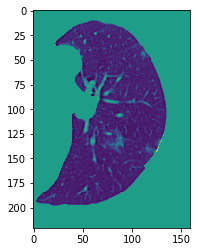

In [21]:
plt.imshow(left_lung_array[200])

In [26]:
help(nibabel.load)

Help on function load in module nibabel.loadsave:

load(filename, **kwargs)
    Load file given filename, guessing at file type
    
    Parameters
    ----------
    filename : str or os.PathLike
       specification of file to load
    \*\*kwargs : keyword arguments
        Keyword arguments to format-specific load
    
    Returns
    -------
    img : ``SpatialImage``
       Image of guessed type

